In [38]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import re
from m3util.viz.layout import layout_fig
from m3util.viz.style import set_style
set_style("printing")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
printing set for seaborn


In [40]:
df = pd.read_csv('../../results/training_history/full_history.csv')
df.sample(5)

,Name,State,Group,epoch,records,train_loss,valid_loss,valid_noise_loss,valid_atom_loss,train_accuracy,valid_accuracy,valid_noise_accuracy,valid_atom_accuracy
16,09112024-resnet50-dataset_v5_size-10m,finished,dataset_v5_size_vs_records,20,162894513,0.012698,0.018234,0.204704,0.902724,0.996928,0.995358,0.945480,0.858064
23,09022024-resnet50-dataset_v5_size-10k,finished,dataset_v5_size_vs_records,2500,21513432,0.033350,2.985549,5.489597,4.607261,0.988912,0.554363,0.134010,0.348647
20,09032024-resnet50-dataset_v5_size-5m,finished,dataset_v5_size_vs_records,20,81499273,0.011643,0.020937,0.273390,1.183674,0.997277,0.994947,0.935147,0.842422
14,09232024-FPN-dataset_v5_size-1k,finished,dataset_v5_size_vs_records-FPN,10000,8671143,0.000846,8.795190,9.942680,9.231884,1.000000,0.106977,0.062343,0.069275
5,09302024-XCiT-dataset_v5_size-100k,finished,dataset_v5_size_vs_records-XCiT,300,25720320,0.001598,0.267760,2.094841,3.522698,0.999370,0.963727,0.718510,0.659725


In [18]:
dataset_size_dict = {
    '1k': 1000,
    '10k': 10000,
    '100k': 100000,
    '500k': 500000,
    '1m': 1000000,
    '2m': 2000000,
    '5m': 5000000,
    '10m': 10000000,
}
task_names, model_names, dataset_sizes = [], [], []
for name in df['Name']:
    model_name = re.split(r'[-_]', name)[1]
    dataset_size = re.split(r'[-_]', name)[5]
    task_name = model_name + '-' + str(dataset_size)
    
    dataset_size_int = dataset_size_dict[re.split(r'[-_]', name)[5]]
    task_names.append(task_name)
    model_names.append(model_name)
    dataset_sizes.append(dataset_size_int)
    
df_summary = df.copy()
df_summary['Task_name'] = task_names
df_summary['Task_name'] = df_summary['Task_name'].str.replace('resnet50', 'ResNet50')
df_summary['Model_name'] = model_names
df_summary.replace({'Model_name': {'resnet50': 'ResNet50'}}, inplace=True)
df_summary['Dataset_size'] = dataset_sizes
df_summary.drop(columns=['Name', 'State', 'Group', 'records'], inplace=True)
df_summary.sample(5)

,epoch,train_loss,valid_loss,valid_noise_loss,valid_atom_loss,train_accuracy,valid_accuracy,valid_noise_accuracy,valid_atom_accuracy,Task_name,Model_name,Dataset_size
7,20,0.006962,0.020497,0.237720,1.737271,0.997817,0.995589,0.953284,0.813172,FPN-5m,FPN,5000000
13,3000,0.000226,1.833005,7.115713,6.954863,0.999883,0.790014,0.414529,0.439755,XCiT-10k,XCiT,10000
4,20,0.007143,0.013827,0.130110,0.777767,0.997795,0.996754,0.974618,0.918574,XCiT-10m,XCiT,10000000
14,10000,0.000846,8.795190,9.942680,9.231884,1.000000,0.106977,0.062343,0.069275,FPN-1k,FPN,1000
23,2500,0.033350,2.985549,5.489597,4.607261,0.988912,0.554363,0.134010,0.348647,ResNet50-10k,ResNet50,10000


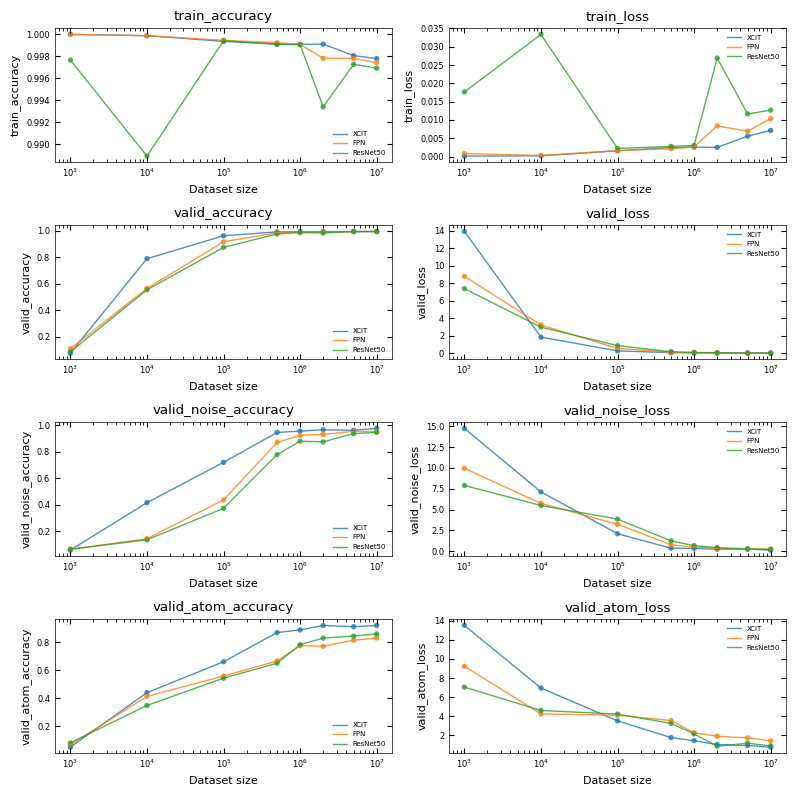

In [37]:
fig, axes = layout_fig(8, 2, figsize=(8, 8), layout='tight')
keys = ["train_accuracy", "train_loss", "valid_accuracy", "valid_loss", "valid_noise_accuracy", "valid_noise_loss", "valid_atom_accuracy", "valid_atom_loss"]
for ax, key in zip(axes, keys):
    sns.scatterplot(data=df_summary, x='Dataset_size', y=key, hue='Model_name', ax=ax, s=15, edgecolor='none', alpha=0.8, legend=False)
    sns.lineplot(data=df_summary, x='Dataset_size', y=key, hue='Model_name', ax=ax, linewidth=1, alpha=0.8)
    ax.set_xscale('log')
    ax.set_xlabel('Dataset size')
    ax.set_ylabel(key)
    if 'loss' in key:
        ax.legend(loc='upper right')
    else:
        ax.legend(loc='lower right')
plt.savefig('../../figures/training_statistics.png', dpi=600)
plt.savefig('../../figures/training_statistics.svg', dpi=600)
plt.show()

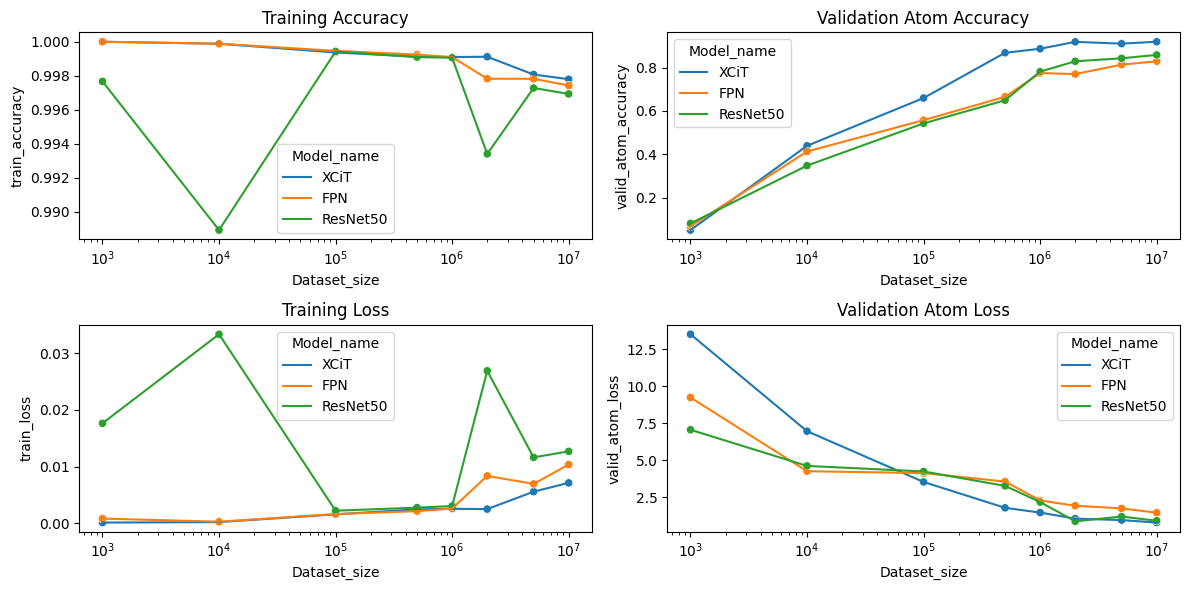

In [20]:
fig, axes = layout_fig(4, 2, figsize=(12, 6), layout='tight')

ax = axes[0]
sns.scatterplot(data=df_summary, x='Dataset_size', y='train_accuracy', hue='Model_name', ax=ax, legend=False)
sns.lineplot(data=df_summary, x='Dataset_size', y='train_accuracy', hue='Model_name', ax=ax)
ax.set_xscale('log')
ax.set_title('Training Accuracy')

ax = axes[1]
sns.scatterplot(data=df_summary, x='Dataset_size', y='valid_atom_accuracy', hue='Model_name', ax=ax, legend=False)
sns.lineplot(data=df_summary, x='Dataset_size', y='valid_atom_accuracy', hue='Model_name', ax=ax)
ax.set_xscale('log')
ax.set_title('Validation Atom Accuracy')

ax = axes[2]
sns.scatterplot(data=df_summary, x='Dataset_size', y='train_loss', hue='Model_name', ax=ax, legend=False)
sns.lineplot(data=df_summary, x='Dataset_size', y='train_loss', hue='Model_name', ax=ax)
ax.set_xscale('log')
ax.set_title('Training Loss')

ax = axes[3]
sns.scatterplot(data=df_summary, x='Dataset_size', y='valid_atom_loss', hue='Model_name', ax=ax, legend=False)
sns.lineplot(data=df_summary, x='Dataset_size', y='valid_atom_loss', hue='Model_name', ax=ax)
ax.set_xscale('log')
ax.set_title('Validation Atom Loss')

plt.show()

In [4]:
df = pd.read_csv('../../results/results.csv')
df

,Name,State,Group,epoch,records,train_loss,valid_loss,valid_noise_loss,valid_atom_loss,train_accuracy,valid_accuracy,valid_noise_accuracy,valid_atom_accuracy
0,09302024-XCiT-dataset_v5_size-10m,finished,dataset_v5_size_vs_records-XCiT,20,162894513,0.007143,0.013827,0.130110,0.777767,0.997795,0.996754,0.974618,0.918574
1,09302024-XCiT-dataset_v5_size-2m,finished,dataset_v5_size_vs_records-XCiT,50,84069723,0.002518,0.036749,0.244863,1.043416,0.999116,0.995537,0.964333,0.918108
2,09302024-XCiT-dataset_v5_size-5m,finished,dataset_v5_size_vs_records-XCiT,20,81499273,0.005595,0.015812,0.249501,0.946104,0.998069,0.996476,0.960451,0.909779
3,09302024-XCiT-dataset_v5_size-1m,finished,dataset_v5_size_vs_records-XCiT,100,59215473,0.002574,0.045677,0.331412,1.452604,0.999101,0.994453,0.954206,0.886279
4,09302024-XCiT-dataset_v5_size-500k,finished,dataset_v5_size_vs_records-XCiT,150,62657117,0.002475,0.060843,0.361368,1.774735,0.999119,0.993102,0.944157,0.867804
5,09112024-resnet50-dataset_v5_size-10m,finished,dataset_v5_size_vs_records,20,162894513,0.012698,0.018234,0.204704,0.902724,0.996928,0.995358,0.945480,0.858064
6,09032024-resnet50-dataset_v5_size-5m,finished,dataset_v5_size_vs_records,20,81499273,0.011643,0.020937,0.273390,1.183674,0.997277,0.994947,0.935147,0.842422
7,09282024-FPN-dataset_v5_size-10m,finished,dataset_v5_size_vs_records-FPN,20,162894513,0.010372,0.016832,0.261832,1.441882,0.997425,0.995890,0.950745,0.828819
8,09052024-resnet50-dataset_v5_size-2m,finished,dataset_v5_size_vs_records,40,66933453,0.026900,0.059126,0.425913,0.865291,0.993397,0.985476,0.872951,0.828740
9,09272024-FPN-dataset_v5_size-5m,finished,dataset_v5_size_vs_records-FPN,20,81499273,0.006962,0.020497,0.237720,1.737271,0.997817,0.995589,0.953284,0.813172


In [2]:
df = pd.read_csv('../../data/results.csv')
df.sample(5)

dataset_size_dict = {
    '10k': 10000,
    '100k': 100000,
    '500k': 500000,
    '1m': 1000000,
    '2m': 2000000,
    '5m': 5000000,
    '10m': 10000000,
}
task_names, model_names, dataset_sizes = [], [], []
for name in df['Name']:
    model_name = re.split(r'[-_]', name)[1]
    dataset_size = re.split(r'[-_]', name)[5]
    task_name = model_name + '-' + str(dataset_size)
    
    dataset_size_int = dataset_size_dict[re.split(r'[-_]', name)[5]]
    
    task_names.append(task_name)
    model_names.append(model_name)
    dataset_sizes.append(dataset_size_int)
print(task_names)
print(model_names)
print(dataset_sizes)

['XCiT-10m', 'XCiT-2m', 'XCiT-5m', 'XCiT-1m', 'XCiT-500k', 'resnet50-10m', 'resnet50-5m', 'FPN-10m', 'resnet50-2m', 'FPN-5m', 'resnet50-1m', 'FPN-1m', 'FPN-2m', 'FPN-500k', 'XCiT-100k', 'resnet50-500k', 'FPN-100k', 'resnet50-100k']
['XCiT', 'XCiT', 'XCiT', 'XCiT', 'XCiT', 'resnet50', 'resnet50', 'FPN', 'resnet50', 'FPN', 'resnet50', 'FPN', 'FPN', 'FPN', 'XCiT', 'resnet50', 'FPN', 'resnet50']
[10000000, 2000000, 5000000, 1000000, 500000, 10000000, 5000000, 10000000, 2000000, 5000000, 1000000, 1000000, 2000000, 500000, 100000, 500000, 100000, 100000]


In [3]:
df['Task_name'] = task_names
df['Model_name'] = model_names
df['Dataset_size'] = dataset_sizes
df.drop(columns=['Name', 'State', 'Group', 'records'], inplace=True)
df

,epoch,train_loss,valid_loss,valid_noise_loss,valid_atom_loss,train_accuracy,valid_accuracy,valid_noise_accuracy,valid_atom_accuracy,Task_name,Model_name,Dataset_size
0,20,0.007143,0.013827,0.130110,0.777767,0.997795,0.996754,0.974618,0.918574,XCiT-10m,XCiT,10000000
1,50,0.002518,0.036749,0.244863,1.043416,0.999116,0.995537,0.964333,0.918108,XCiT-2m,XCiT,2000000
2,20,0.005595,0.015812,0.249501,0.946104,0.998069,0.996476,0.960451,0.909779,XCiT-5m,XCiT,5000000
3,100,0.002574,0.045677,0.331412,1.452604,0.999101,0.994453,0.954206,0.886279,XCiT-1m,XCiT,1000000
4,150,0.002475,0.060843,0.361368,1.774735,0.999119,0.993102,0.944157,0.867804,XCiT-500k,XCiT,500000
5,20,0.012698,0.018234,0.204704,0.902724,0.996928,0.995358,0.945480,0.858064,resnet50-10m,resnet50,10000000
6,20,0.011643,0.020937,0.273390,1.183674,0.997277,0.994947,0.935147,0.842422,resnet50-5m,resnet50,5000000
7,20,0.010372,0.016832,0.261832,1.441882,0.997425,0.995890,0.950745,0.828819,FPN-10m,FPN,10000000
8,40,0.026900,0.059126,0.425913,0.865291,0.993397,0.985476,0.872951,0.828740,resnet50-2m,resnet50,2000000
9,20,0.006962,0.020497,0.237720,1.737271,0.997817,0.995589,0.953284,0.813172,FPN-5m,FPN,5000000


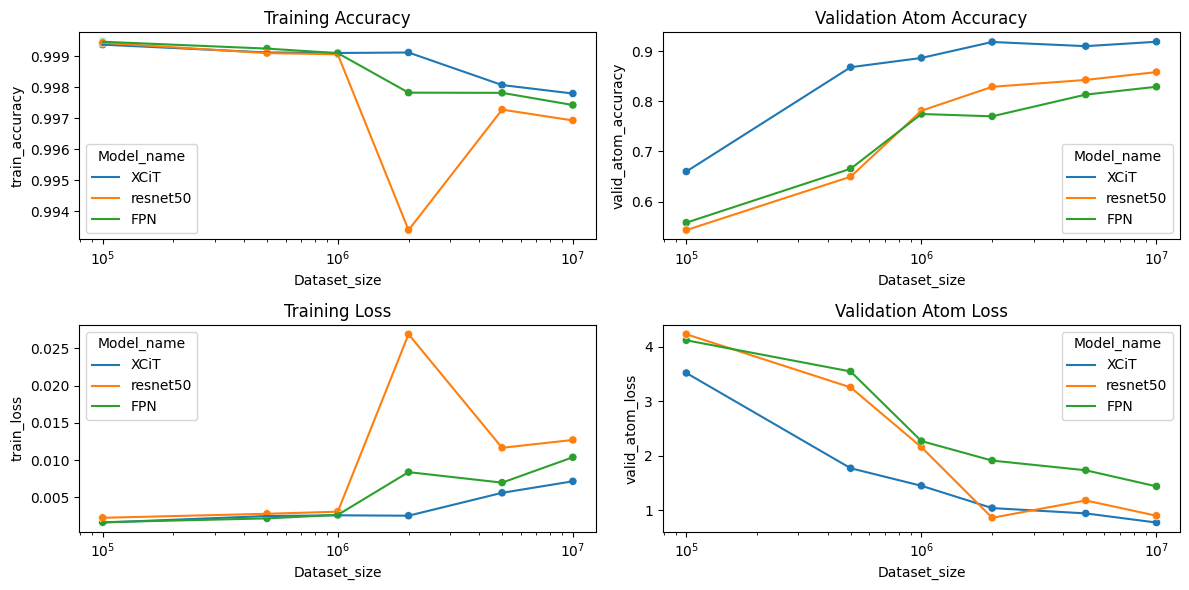

In [8]:
fig, axes = layout_fig(4, 2, figsize=(12, 6), layout='tight')

ax = axes[0]
sns.scatterplot(data=df, x='Dataset_size', y='train_accuracy', hue='Model_name', ax=ax, legend=False)
sns.lineplot(data=df, x='Dataset_size', y='train_accuracy', hue='Model_name', ax=ax)
ax.set_xscale('log')
ax.set_title('Training Accuracy')

ax = axes[1]
sns.scatterplot(data=df, x='Dataset_size', y='valid_atom_accuracy', hue='Model_name', ax=ax, legend=False)
sns.lineplot(data=df, x='Dataset_size', y='valid_atom_accuracy', hue='Model_name', ax=ax)
ax.set_xscale('log')
ax.set_title('Validation Atom Accuracy')

ax = axes[2]
sns.scatterplot(data=df, x='Dataset_size', y='train_loss', hue='Model_name', ax=ax, legend=False)
sns.lineplot(data=df, x='Dataset_size', y='train_loss', hue='Model_name', ax=ax)
ax.set_xscale('log')
ax.set_title('Training Loss')

ax = axes[3]
sns.scatterplot(data=df, x='Dataset_size', y='valid_atom_loss', hue='Model_name', ax=ax, legend=False)
sns.lineplot(data=df, x='Dataset_size', y='valid_atom_loss', hue='Model_name', ax=ax)
ax.set_xscale('log')
ax.set_title('Validation Atom Loss')

plt.show()

In [ ]:
dataset_size_orders = ['1k', '10k', '100k', '500k', '1m', '2m', '5m', '10m']

In [11]:
df_list = []
for file in glob.glob('../../data/*history.csv'):
    df = pd.read_csv(file)
    df = df.drop(columns=['_step', '_runtime', '_timestamp'])
    model_name = re.split(r'[-_]', file)[1]
    dataset_size = re.split(r'[-_]', file)[5]
    task_name = model_name + '-' + dataset_size
    df['task_name'] = task_name
    if model_name == 'XCiT':
        print(file, task_name)
        df_list.append(df)
df_all = pd.concat(df_list, ignore_index=True)
df_all.tail()

../../data/09302024-XCiT-dataset_v5_size-500k_full_history.csv XCiT-500k
../../data/09302024-XCiT-dataset_v5_size-100k_full_history.csv XCiT-100k
../../data/09302024-XCiT-dataset_v5_size-5m_full_history.csv XCiT-5m
../../data/09302024-XCiT-dataset_v5_size-1m_full_history.csv XCiT-1m
../../data/09302024-XCiT-dataset_v5_size-2m_full_history.csv XCiT-2m
../../data/09232024-XCiT-dataset_v5_size-1k_full_history.csv XCiT-1k
../../data/09302024-XCiT-dataset_v5_size-10m_full_history.csv XCiT-10m


,train_accuracy,valid_atom_accuracy,valid_atom_loss,train_loss,valid_accuracy,records,valid_noise_loss,valid_noise_accuracy,epoch,valid_loss,task_name
813744,NaN,NaN,NaN,NaN,NaN,162892273.0,0.119890,0.973256,NaN,NaN,XCiT-10m
813745,NaN,NaN,NaN,NaN,NaN,162893133.0,0.140086,0.974419,NaN,NaN,XCiT-10m
813746,NaN,NaN,NaN,NaN,NaN,162893993.0,0.128206,0.972093,NaN,NaN,XCiT-10m
813747,NaN,NaN,NaN,NaN,NaN,162894513.0,0.087073,0.980769,NaN,NaN,XCiT-10m
813748,NaN,NaN,NaN,NaN,NaN,NaN,0.130110,0.974618,20.0,NaN,XCiT-10m


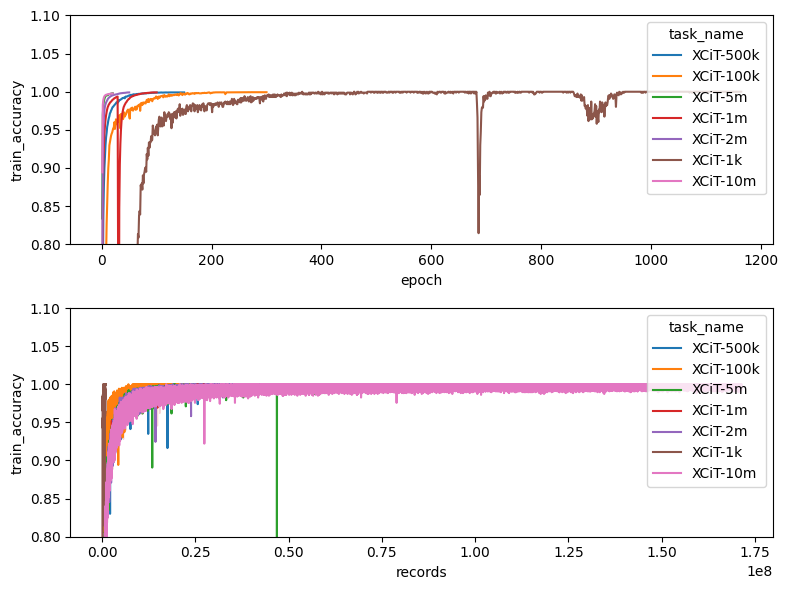

In [14]:
fig, axes = layout_fig(2, 1, figsize=(8, 6), layout='tight')

ax = axes[0]
sns.lineplot(data=df_all, x='epoch', y='train_accuracy', hue='task_name', ax=ax)
ax.set_ylim(0.8, 1.1)

ax = axes[1]
sns.lineplot(data=df_all, x='records', y='train_accuracy', hue='task_name', ax=ax)
ax.set_ylim(0.8, 1.1)
plt.show()

(0.8, 1.1)

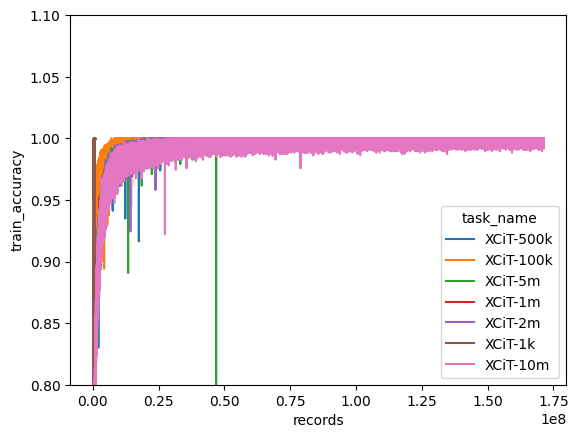

In [13]:
fig, ax = layout_fig(1, 1, figsize=(8, 4), layout='tight')
sns.lineplot(data=df_all, x='records', y='train_accuracy', hue='task_name')
plt.ylim(0.8, 1.1)
plt.